More explanation about the sphere point picking :https://mathworld.wolfram.com/SpherePointPicking.html

## Group: 9

Names:
1. Subarna Chaki
2. Sanket Bangar
3. Survi Kumari
4. Asit Dave

# P01: A short introduction to $\texttt{python}$ & $\texttt{git}$

## Problem 1: Randomly sampling points on the sphere

In this problem, we will learn how to generate points that uniformly sample the surface of a sphere.

First, go to the class' `jupyterhub` server and create a new notebook. In your notebook, do the following:
 
- Write a piece of code that will sample 10,000 points uniformly distributed on the surface of a sphere. Your code should return the points' angular coordinates $\theta, \phi$ (you can assume a unit sphere wlog).  
- Write a piece of code that will project the points into Carthesian coordinates ($x, y, z$), again assuming unit radius.  
- Make three 2D scatter plots of the points after projecting along the $x, y$ and $z$ axis. 
- Plot a 1D histogram of the $x, y$ and $z$ distributions.
- Interpret your results. In particular, discuss if your points are uniformly distributed. Why? Why not?

## Problem 2: Randomly sampling points on the sphere with $\texttt{python}$ scripts

In an IDE (e.g. PyCharm):  
(i) Make two python files (ending in .py):  
- One file will contain functions for data manipulation.  
- One file will contain functions for plotting.  

(ii) In the file for doing the calculations, create two functions:  
- A function that will randomly sample from the surface of a sphere. The input should be the size of the sample. The outputs should be the spherical coordinates $\theta$ and $\phi$ of all the points.  
- A function for projecting a set of points in spherical coordinates to Cartesian coordinates. Inputs should be the spherical coordinates of the points and an optional radius parameter (default is set to 1). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sample_sphere(n):
    
    phi = np.arccos(2 * np.random.rand(n) - 1)  # Polar angle between 0 and pi
    theta = 2 * np.pi * np.random.rand(n)  # Azimuthal angle between 0 and 2*pi

    return theta, phi

def get_cartesian_coords(phi, theta, r = 1):
    
    x = r * np.cos(theta) * np.sin(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(phi)

    return x, y, z

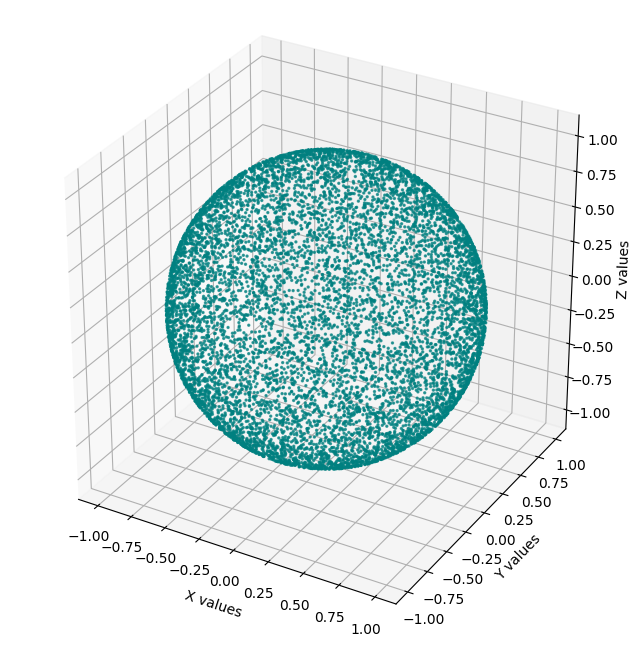

In [2]:
# 3D scatter plot for better visualization

phi = sample_sphere(10000)[1]
theta = sample_sphere(10000)[0]

# Extracting x, y, z values for given number of samples
x, y, z = get_cartesian_coords(phi, theta)

# Creating a 3D scatter plot
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, s = 2, color = 'teal', alpha = 0.7)

# Setting axis labels and plot title
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Z values')
ax.set_aspect('equal')

plt.show()

(iii) In the file for plotting, create two functions:
- A function for making the scatter plots.  
- A function for making the histogram plots.

In [3]:
import matplotlib.pyplot as plt 
import numpy as np

def plot_scatter():

    # Creating scatter plots for projection
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))

    ax1.scatter(x, y, s = 2, c = 'teal', alpha = 0.7)
    ax1.set_title('XY Plane')
    ax1.set_aspect('equal')

    ax2.scatter(y, z, s = 2, c = 'crimson', alpha = 0.7)
    ax2.set_title('YZ Plane')
    ax2.set_aspect('equal')

    ax3.scatter(z, x, s = 2, c = '#ff4500', alpha = 0.5)
    ax3.set_title('ZX Plane')
    ax3.set_aspect('equal')

    plt.tight_layout()
    plt.show()
    
def plot_histogram():
    # Creating histogram for axial distribution
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))

    ax1.hist(x, bins = 55, edgecolor = 'black', color = 'teal', alpha = 0.7, lw = 0.5)
    ax1.set_title('X Distribution')

    ax2.hist(y, bins = 55, edgecolor = 'black', color = 'crimson', alpha = 0.7, lw = 0.5)
    ax2.set_title('Y Distribution')

    ax3.hist(z, bins = 55, edgecolor = 'black', color = '#ff4500', alpha = 0.7, lw = 0.5)
    ax3.set_title('Z Distribution')

    plt.tight_layout()

    plt.show()

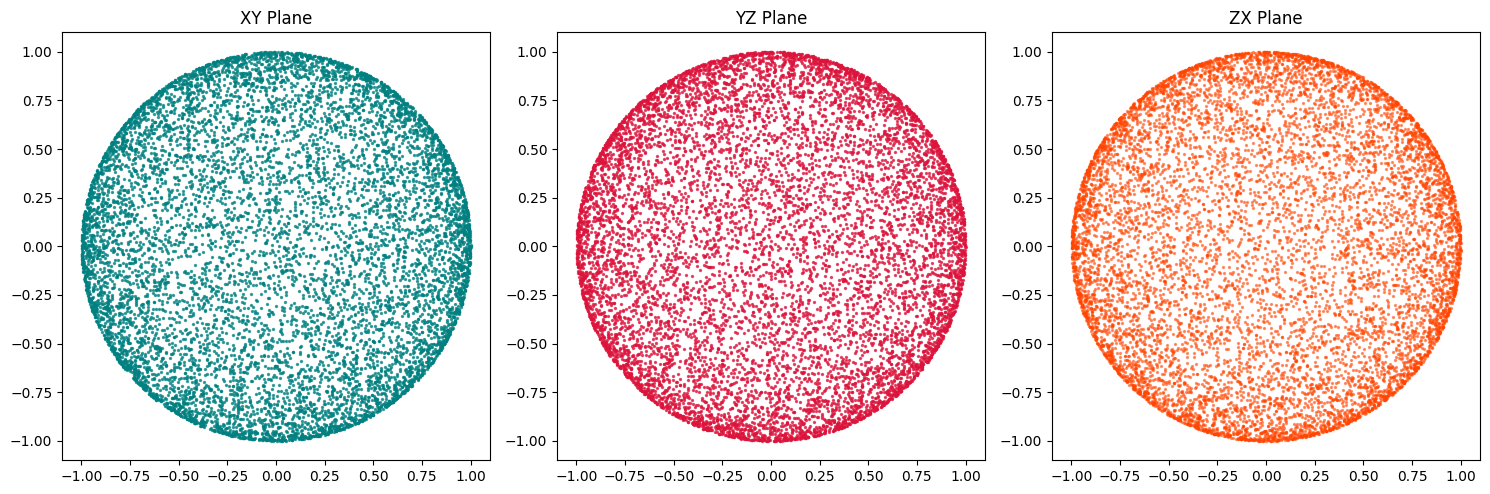

In [4]:
plot_scatter()

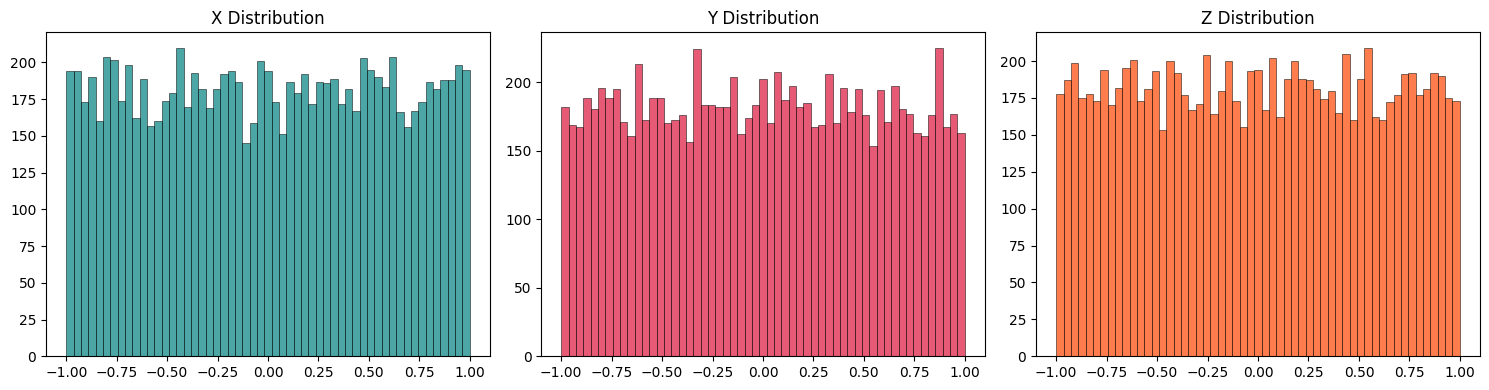

In [5]:
plot_histogram()

#### Reasoning for Uniform distribution

Here, we see that we get a (nearly) uniform distribution of points on the sphere. The reason can be attributed to the fact that we sample/distribute longitude and latitude uniformly. The random points are created by making use of the range of cosine function. This leads to the uniform distribution of points on the sphere. 
On the other hand, if we just sample the points using the following lines of code: 
``` 
phi = np.random.uniform(0, np.pi, n) # Polar angle
theta = np.random.uniform(0, 2*np.pi, n) # Azimuthal angle
```
    
then these leads to a condition where the points are concentrated at the poles. This happens because the points doesn't sustain uniformity when they undergo coordinate transformation.

(iv) In a `jupyter` notebook :
- Import your functions.
- Repeat the operations from problem 1, this time using your functions.

#### Solution to Problem 2

In [6]:
from manipulation import make_sphere # Importing the function

# Extracting the values using a function that takes in the size of sample you want.
x, y, z = make_sphere(10000) # 10000 samples are generated

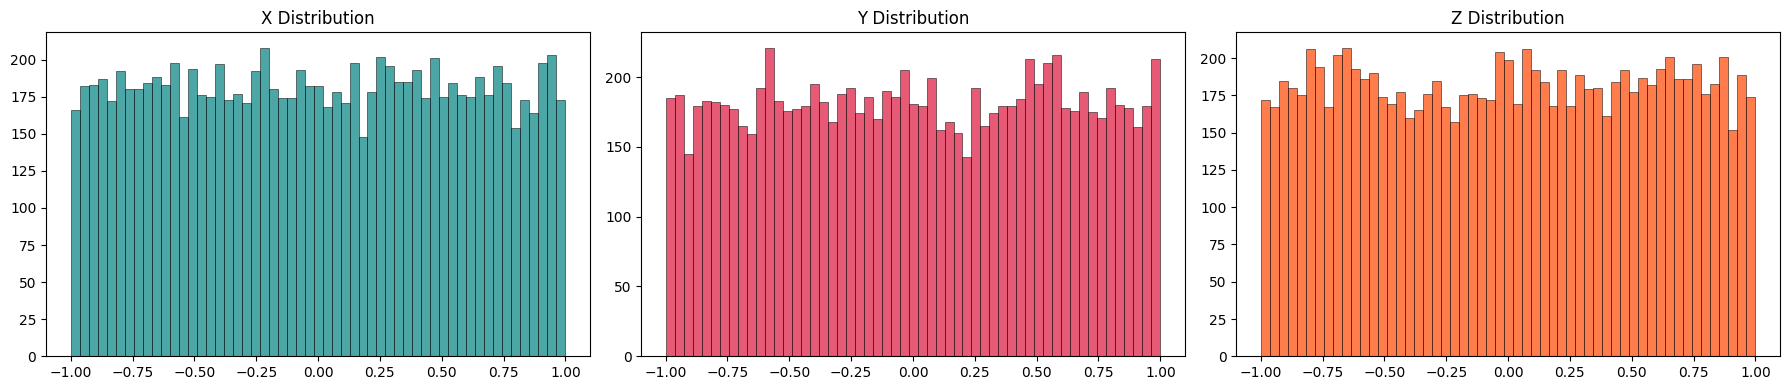

In [7]:
from plotting import sphere, histogram, projection

# Plotting the histogram for every axis
histogram(x, y, z)  

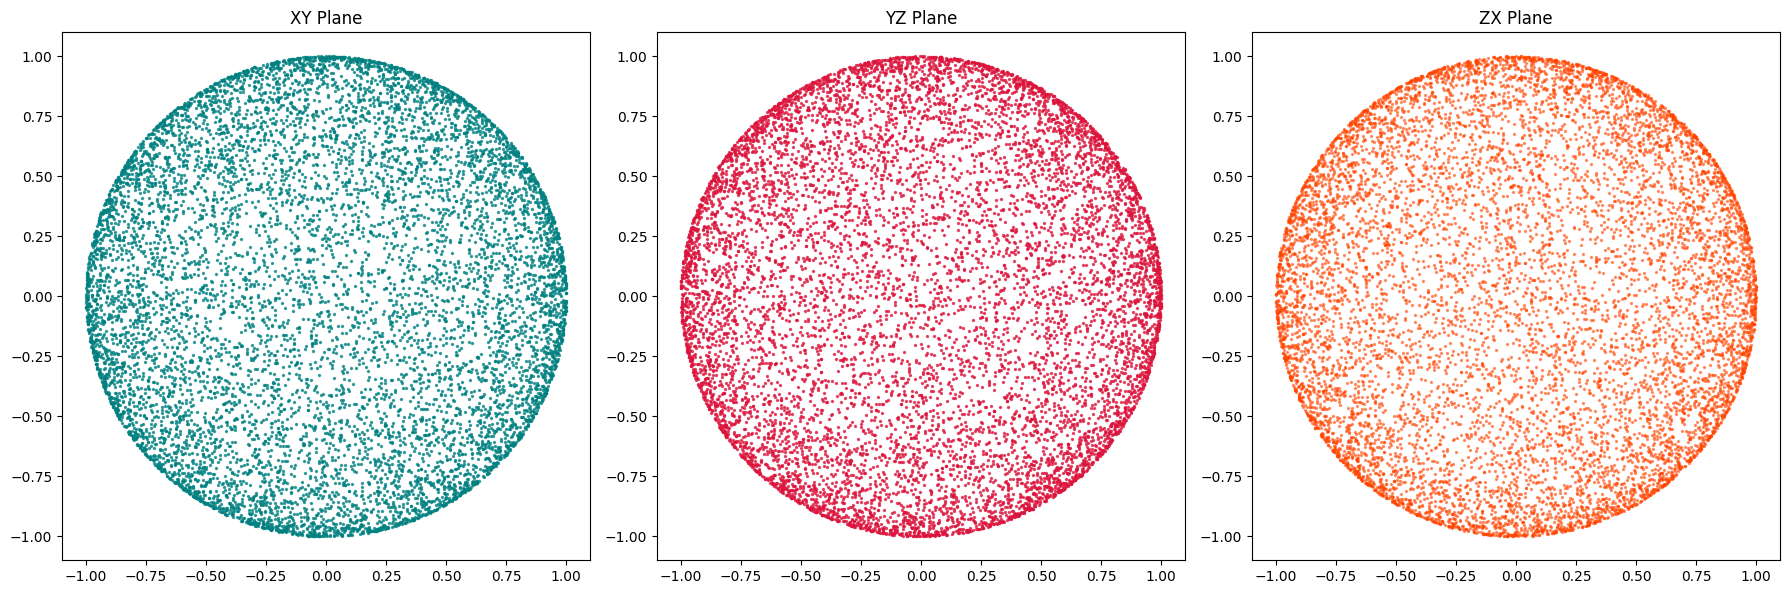

In [8]:
# Projection plots for every plane for respective values of x, y, z
projection(x, y, z)

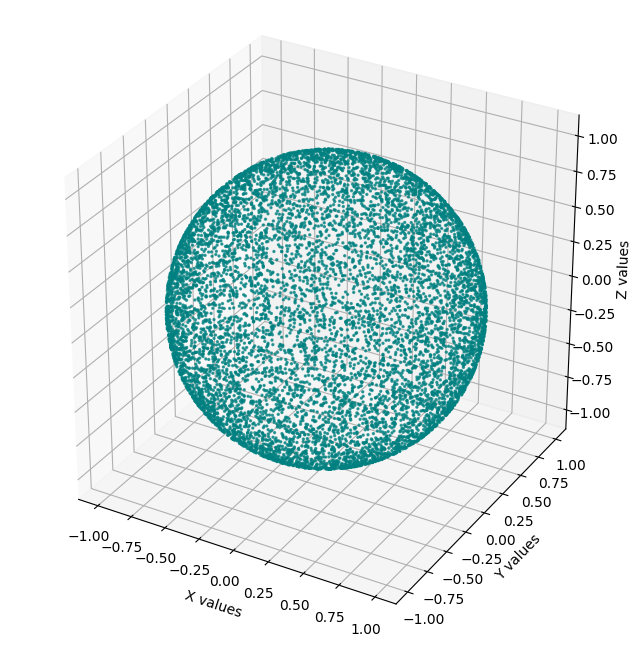

In [9]:
# 3D Plot for better visualization for respective values of x, y, z
sphere(x, y, z)